<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.903324,31.619477,47.139133,-0.341581,184.320353,184.603552,-0.283199
1,0.0,1.0,98.802694,95.336083,58.347959,-0.077384,262.409351,262.385626,0.023725
2,0.0,2.0,45.497161,54.904712,28.258733,0.082864,138.743470,138.565434,0.178036
3,0.0,3.0,49.442094,51.658154,82.461287,0.145433,193.706968,193.540211,0.166757
4,0.0,4.0,99.555159,76.844212,82.750937,0.042179,269.192489,269.097872,0.094616
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.768921,23.092898,79.761043,0.176099,140.798962,140.727627,0.071335
29996,999.0,26.0,98.882736,77.857211,52.125326,-0.142705,238.722568,238.812803,-0.090235
29997,999.0,27.0,49.841270,57.494319,20.917616,-0.340414,137.912791,138.258144,-0.345354
29998,999.0,28.0,42.504915,67.296507,92.215612,0.367661,212.384695,212.024288,0.360407


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.903324  31.619477  47.139133  ...  184.320353  184.603552 -0.283199
      1.0    98.802694  95.336083  58.347959  ...  262.409351  262.385626  0.023725
      2.0    45.497161  54.904712  28.258733  ...  138.743470  138.565434  0.178036
      3.0    49.442094  51.658154  82.461287  ...  193.706968  193.540211  0.166757
      4.0    99.555159  76.844212  82.750937  ...  269.192489  269.097872  0.094616
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   27.768921  23.092898  79.761043  ...  140.798962  140.727627  0.071335
      26.0   98.882736  77.857211  52.125326  ...  238.722568  238.812803 -0.090235
      27.0   49.841270  57.494319  20.917616  ...  137.912791  138.258144 -0.345354
      28.0   42.504915  67.296507  92.215612  ...  212.384695  212.024288  0.360407
      29.0   31.282449  79.577452  58.394724  ...  179.165580  179.231529 -0.065949

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.903324  31.619477  47.139133  ...  184.320353  184.603552 -0.283199
      1.0    98.802694  95.336083  58.347959  ...  262.409351  262.385626  0.023725
      2.0    45.497161  54.904712  28.258733  ...  138.743470  138.565434  0.178036
      3.0    49.442094  51.658154  82.461287  ...  193.706968  193.540211  0.166757
      4.0    99.555159  76.844212  82.750937  ...  269.192489  269.097872  0.094616
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   27.768921  23.092898  79.761043  ...  140.798962  140.727627  0.071335
      26.0   98.882736  77.857211  52.125326  ...  238.722568  238.812803 -0.090235
      27.0   49.841270  57.494319  20.917616  ...  137.912791  138.258144 -0.345354
      28.0   42.504915  67.296507  92.215612  ...  212.384695  212.024288  0.360407
      29.0   31.282449  79.577452  58.394724  ...  179.165580  179.231529 -0.065949

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.903324,31.619477,47.139133,-0.341581,184.320353,184.603552,-0.283199
1,0.0,1.0,98.802694,95.336083,58.347959,-0.077384,262.409351,262.385626,0.023725
2,0.0,2.0,45.497161,54.904712,28.258733,0.082864,138.743470,138.565434,0.178036
3,0.0,3.0,49.442094,51.658154,82.461287,0.145433,193.706968,193.540211,0.166757
4,0.0,4.0,99.555159,76.844212,82.750937,0.042179,269.192489,269.097872,0.094616
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.768921,23.092898,79.761043,0.176099,140.798962,140.727627,0.071335
29996,999.0,26.0,98.882736,77.857211,52.125326,-0.142705,238.722568,238.812803,-0.090235
29997,999.0,27.0,49.841270,57.494319,20.917616,-0.340414,137.912791,138.258144,-0.345354
29998,999.0,28.0,42.504915,67.296507,92.215612,0.367661,212.384695,212.024288,0.360407


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.903324  31.619477  47.139133  ...  184.320353  184.603552 -0.283199
      1.0    98.802694  95.336083  58.347959  ...  262.409351  262.385626  0.023725
      2.0    45.497161  54.904712  28.258733  ...  138.743470  138.565434  0.178036
      3.0    49.442094  51.658154  82.461287  ...  193.706968  193.540211  0.166757
      4.0    99.555159  76.844212  82.750937  ...  269.192489  269.097872  0.094616
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   27.768921  23.092898  79.761043  ...  140.798962  140.727627  0.071335
      26.0   98.882736  77.857211  52.125326  ...  238.722568  238.812803 -0.090235
      27.0   49.841270  57.494319  20.917616  ...  137.912791  138.258144 -0.345354
      28.0   42.504915  67.296507  92.215612  ...  212.384695  212.024288  0.360407
      29.0   31.282449  79.577452  58.394724  ...  179.165580  179.231529 -0.065949

[30000 rows x 7 columns]

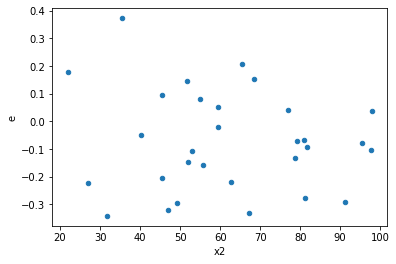

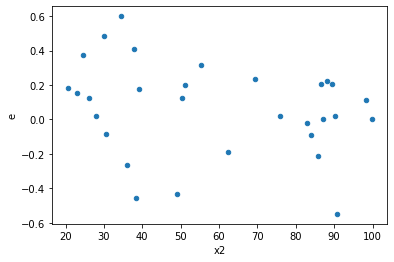

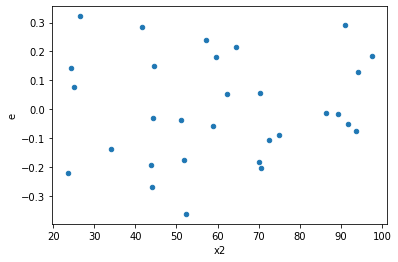

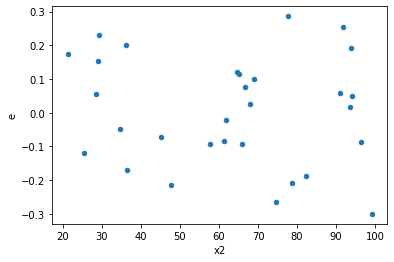

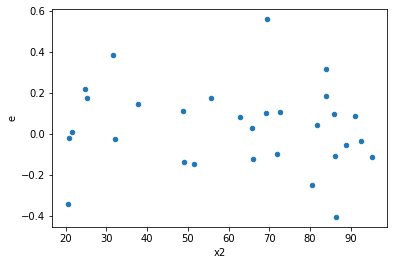

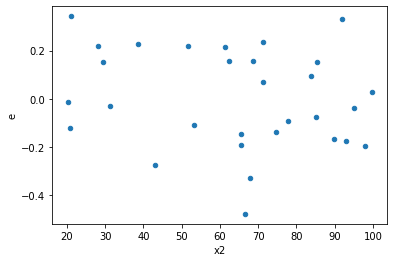

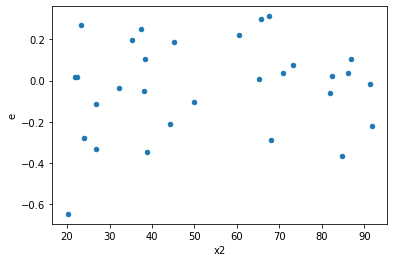

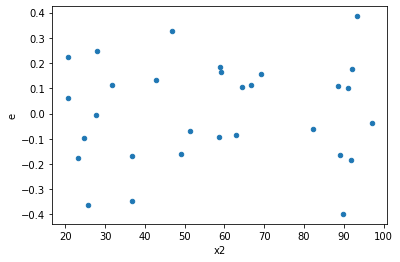

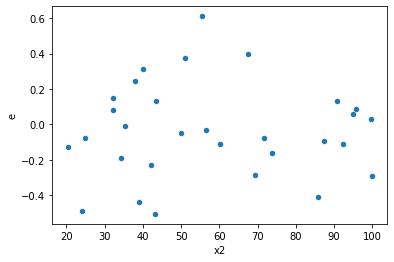

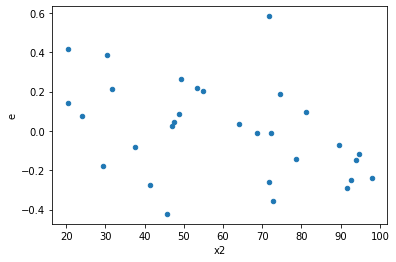

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,14.0,10.0,0.3518650065042212,0.40834501845253846,0.02706653896186317,0.04537166871694872,1.6247225932275127,0.39446665744238985,0.8027666712788051,Reject001=1 : Homoscedasticity
2.0,12.0,12.0,0.313001981060076,0.5095826072071682,0.028454725550915997,0.046325691564288014,1.6280491435910802,0.41060158480025954,0.7946992075998702,Reject001=1 : Homoscedasticity
3.0,15.0,9.0,0.30589883671816503,0.22081424122408677,0.021849916908440358,0.027601780153010846,1.2030896858641889,0.7219113107543991,0.6390443446228005,Reject001=1 : Homoscedasticity
4.0,16.0,8.0,0.44034529570911674,0.36359582139789476,0.02935635304727445,0.051942260199699254,1.651412311842109,0.37400050333557044,0.8129997483322148,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,0.16048374665080659,0.5700568406073824,0.020060468331350823,0.04071834575767017,2.131269436952109,0.2531900843093837,0.8734049578453081,Reject001=1 : Homoscedasticity
8.0,9.0,15.0,0.3121933958641755,1.1549007083232483,0.03902417448302194,0.08249290773737487,2.219587070622799,0.22884028268569212,0.8855798586571539,Reject001=1 : Homoscedasticity
9.0,11.0,13.0,0.37079330388955956,0.4718449362958528,0.03707933038895596,0.03932041135798773,1.0767546324241866,0.9135264543428157,0.5432367728285922,Reject001=1 : Homoscedasticity
11.0,14.0,10.0,0.2021505263319587,0.3609426386005346,0.015550040487073747,0.040104737622281623,2.499719902835893,0.11461583499962624,0.9426920825001869,Reject001=1 : Homoscedasticity
12.0,13.0,11.0,0.5872530312803819,0.5353236940312616,0.04893775260669849,0.053532369403126154,1.07731291464745,0.8868661533006252,0.5565669233496874,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,10.0,0.3518650065042212,0.40834501845253846,0.02706653896186317,0.04537166871694872,1.6247225932275127,0.39446665744238985,Reject001=1 : Homoscedasticity
1.0,14.0,10.0,1.3625654941451046,0.31597985198671574,0.1048127303188542,0.03510887244296842,0.3246609390023877,0.07968988219304035,Reject001=1 : Homoscedasticity
2.0,12.0,12.0,0.313001981060076,0.5095826072071682,0.028454725550915997,0.046325691564288014,1.6280491435910802,0.41060158480025954,Reject001=1 : Homoscedasticity
3.0,15.0,9.0,0.30589883671816503,0.22081424122408677,0.021849916908440358,0.027601780153010846,1.2030896858641889,1.278088689245601,Reject001=1 : Homoscedasticity
4.0,16.0,8.0,0.44034529570911674,0.36359582139789476,0.02935635304727445,0.051942260199699254,1.651412311842109,0.37400050333557044,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,0.16048374665080659,0.5700568406073824,0.020060468331350823,0.04071834575767017,2.131269436952109,0.2531900843093837,Reject001=1 : Homoscedasticity
6.0,12.0,12.0,0.8127004890693502,0.4884714261887128,0.0738818626426682,0.044406493289882984,0.6010472895716814,0.39028568387130586,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,0.4048796288907676,0.3649857829330655,0.04048796288907676,0.030415481911088792,0.7627801005113213,0.6347668644174204,Reject001=1 : Homoscedasticity
8.0,9.0,15.0,0.3121933958641755,1.1549007083232483,0.03902417448302194,0.08249290773737487,2.219587070622799,0.22884028268569212,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      971
Reject001=0 : Heteroscedasticity     29
Name: Result_test, dtype: int64